# 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv("D:\Study\Data Science\Python\ineuron\Data_Set\Student_dataset\stud.csv")
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2 .Hypothesis Testing
#### 2.1 Checking correlation

In [4]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


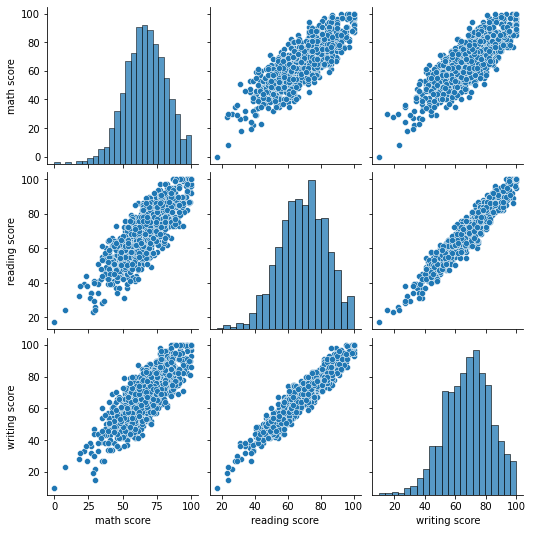

In [5]:
sns.pairplot(data.iloc[:, 4:8])

#### Observations
1. Math, Reading and Writing score data seems to be in linear fashion.
2. Reading and Writing score are highly correlated

#### Seggregating Numerical and Object Features

In [18]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']
numeric_df = data[numeric_features]
categorical_df = data[categorical_features]

#### 2.2  Shapiro Wick Test
* **The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution.**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [26]:
from scipy.stats import shapiro
shapiro_wick_test = []
for column in numeric_features:
    dataToTest = numeric_df[column]
    stat,p = shapiro(dataToTest)
    print(f"Stat value for feature {column} is : {stat}")
    print(f"p value for feature {column} is : {p}")
    if p > 0.05:
        shapiro_wick_test.append("Normally Distributed")
    else:
        shapiro_wick_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[numeric_features, shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

Stat value for feature math score is : 0.9931505918502808
p value for feature math score is : 0.00014530023327097297
Stat value for feature reading score is : 0.9929210543632507
p value for feature reading score is : 0.0001056220498867333
Stat value for feature writing score is : 0.9919633269309998
p value for feature writing score is : 2.9172901122365147e-05


,Column Name,Shapiro Hypothesis Result
0,math score,Not Normally Distributed
1,reading score,Not Normally Distributed
2,writing score,Not Normally Distributed


#### 2.3 K-square Normality Test
* **Test aims to establish whether or not the given sample comes from a normally distributed population. Test is based on transformations of the sample kurtosis and skewness**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [25]:
from scipy.stats import normaltest
normaltest_test = []
for column in numeric_features:
    dataToTest = numeric_df[column]
    stat,p = normaltest(dataToTest)
    print(f"Stat value for feature {column} is : {stat}")
    print(f"p value for feature {column} is : {p}")
    if p > 0.05:
        normaltest_test.append("Normally Distributed")
    else:
        normaltest_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[numeric_features, normaltest_test]).T
result.columns = ['Column Name', 'normaltest Hypothesis Result']
result

Stat value for feature math score is : 15.408960513931822
p value for feature math score is : 0.00045080293869937836
Stat value for feature reading score is : 11.11741279628622
p value for feature reading score is : 0.003853758403576582
Stat value for feature writing score is : 13.606450837263859
p value for feature writing score is : 0.0011101885439899974


,Column Name,normaltest Hypothesis Result
0,math score,Not Normally Distributed
1,reading score,Not Normally Distributed
2,writing score,Not Normally Distributed
